In [37]:
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv", encoding="ISO-8859-1", low_memory=False)
test_data = pd.read_csv("test.csv", encoding="ISO-8859-1", low_memory=False)

In [25]:
drop_thres = 1000
drop_cols = train_data.columns[train_data.isnull().sum() > drop_thres]
train_data.drop(labels=drop_cols, axis=1, inplace=True)

In [27]:
train_data.columns[train_data.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [34]:
sampled_data = train_data.dropna()

In [39]:
coded_data = pd.get_dummies(sampled_data)

In [45]:
from sklearn import preprocessing

x = coded_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized = pd.DataFrame(x_scaled, columns=coded_data.columns)

In [48]:
normalized.SalePrice = coded_data.SalePrice

In [51]:
normalized['SalePrice'] = coded_data.SalePrice

In [53]:
del normalized['SalePrice']

In [54]:
normalized['SalePrice'] = coded_data.SalePrice

In [69]:
model = LinearRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(normalized, coded_data.SalePrice)

In [67]:
normalized.drop(axis=1, labels=['SalePrice', "Id"], inplace=True)

In [79]:
feature_rank = rfe.ranking_
imp_features = normalized.columns[feature_rank <= 2]

In [84]:
missing_values = train_data.columns[train_data.isnull().sum() > 0]

In [133]:
mean_imputer = preprocessing.Imputer(missing_values="NaN", strategy='mean', copy=True)
mode_imputer = preprocessing.Imputer(missing_values="NaN", strategy='most_frequent', copy=True)

In [123]:
floats = []
categoricals = []

for col in missing_values:
    if train_data[col].dtype == 'float64':
        floats.append(col)
    else:
        categoricals.append(col)

In [137]:
mean_imputer.fit(train_data[floats])
train_data[floats] = mean_imputer.transform(train_data[floats])

In [138]:
mode_imputer.fit(train_data[categoricals])
train_data[categoricals] = mode_imputer.transform(train_data[categoricals])

ValueError: could not convert string to float: 'TA'

In [161]:
X_train, X_test, y_train, y_test = train_test_split(extracted, coded_data.SalePrice, test_size=0.2)

In [151]:
clf = LinearRegression()

In [162]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
clf.score(X_test, y_test)

0.056229447044831571

In [160]:
extracted = normalized.loc[:, imp_features]

In [158]:
imp_features

Index(['GarageFinish_Fin', 'GarageFinish_Unf', 'GarageQual_Ex', 'PavedDrive_P',
       'SaleType_COD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object')

In [168]:
y_test.head()

224     386250
3       140000
718     341000
1255    127500
1351    171000
Name: SalePrice, dtype: int64

In [170]:
test_df = pd.get_dummies(test_data)

In [173]:
test_df = test_df.loc[:, imp_features]
test_df.GarageQual_Ex = 0

In [176]:
prices = clf.predict(test_df)

In [177]:
len(prices)

1459

In [187]:
ids = [i for i in range(1461, 2920)]

In [188]:
submit = pd.Series(prices, name="SalePrice")
ids = pd.Series(ids, name="Id")
df = pd.concat([ids, submit], axis=1)
df.to_csv("submit.csv", index=None)

In [185]:
len(df)

1459

In [186]:
len(test_data)

1459

In [196]:
np.c_[[1, 2, 3], [4, 5,6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [197]:
from sklearn.decomposition import PCA

In [206]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(normalized.values)

In [208]:
import matplotlib.pyplot as plt

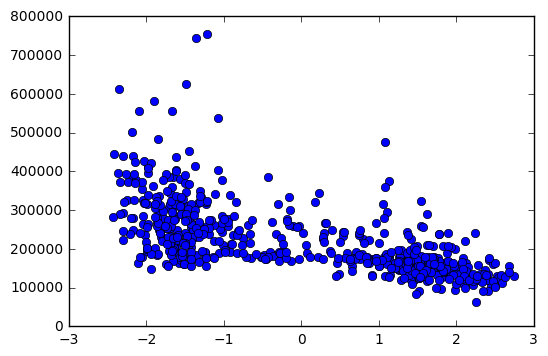

In [210]:
plt.plot(pca_result, coded_data.SalePrice, 'o')
plt.show()